In [1]:
import pandas as pd
import numpy  as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
% matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys, os, copy
print("Using environment in "+sys.prefix)
print("Python version "+sys.version)


/Users/emunsing/Documents/Coding/github/cdips_hpi_forecast/env/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Using environment in /Users/emunsing/Documents/Coding/github/cdips_hpi_forecast/env
Python version 3.5.2 (default, Oct 31 2016, 16:50:28) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]


In [2]:
fname = 'Metro_Zhvi_AllHomes.csv'

#  Map Zillow RegionID to metro area string
metroRegionID = {'Dallas-Fort Worth, TX':394514,
                     'Atlanta, GA':394347,
                     'Phoenix, AZ':394976,
                     'Las Vegas, NV':394775 }

metroString = {'Dallas':u'Dallas-Fort Worth, TX',
               'Atlanta':u'Atlanta, GA',
               'Phoenix':u'Phoenix, AZ',
               'Vegas':u'Las Vegas, NV'}

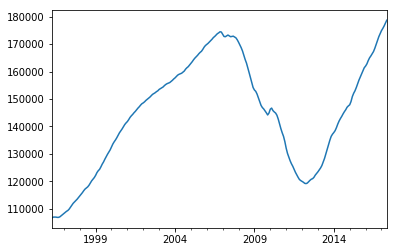

In [3]:
city = 'Atlanta'
startDate = None #'2003-01'
endDate = None

df = pd.read_csv('Data/ZHVI/'+fname,index_col=[1])
df = df.drop(['RegionID','SizeRank'],axis=1)
df.columns = pd.DatetimeIndex(df.columns)
y = df.loc[metroString[city], startDate:endDate ]
y.plot()

In [4]:
X = pd.concat([y.shift(i) for i in range(6)], axis=1,keys = ['L%s'%i for i in range(6)])
X['y'] = y.shift(-6)
X = X.dropna()
X = X.assign(trend=np.arange(len(X)))
X.head()


,L0,L1,L2,L3,L4,L5,y,trend
1996-09-01,106900.0,106900.0,107000.0,107000.0,107000.0,106700.0,109100.0,0
1996-10-01,107100.0,106900.0,106900.0,107000.0,107000.0,107000.0,109400.0,1
1996-11-01,107500.0,107100.0,106900.0,106900.0,107000.0,107000.0,109900.0,2
1996-12-01,107900.0,107500.0,107100.0,106900.0,106900.0,107000.0,110600.0,3
1997-01-01,108300.0,107900.0,107500.0,107100.0,106900.0,106900.0,111300.0,4


In [5]:
mod_lagged = smf.ols('y ~ trend + L0 + L1 + L2 + L3 + L4 + L5', data=X)
res_lagged = mod_lagged.fit()
res_lagged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3127.
Date:                Thu, 20 Jul 2017   Prob (F-statistic):          5.39e-228
Time:                        09:51:53   Log-Likelihood:                -2183.5
No. Observations:                 243   AIC:                             4383.
Df Residuals:                     235   BIC:                             4411.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5760.1954    997.396      5.775      0.000    3795.215    7725.176
trend          4.5090      1.920      2.349      0.020       0.727       8.291
L0             5.8054      0.550     10.558      0.000       4.722       6.889
L1            -6.7399      1.360     -4.957      0.000      -9.419      -4.061
L2             4.3553      1.749      2.490      0.013       0.909       7.801
L3            -2.5545      1.748     -1.462      0.145      -5.997       0.888
L4             0.0360      1.355      0.027      0.979      -2.634       2.706
L5             0.0561      0.548      0.102      0.919      -1.024       1.136
==============================================================================
Omnibus:                       57.334   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.931
Skew:                          -1.099   Prob(JB):                     8.27e-30
Kurtosis:                       5.898   Cond. No.                     2.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

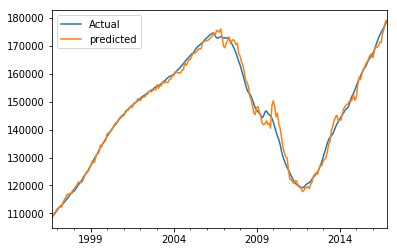

In [9]:
yhat = res_lagged.predict(X[['trend','L0','L1','L2','L3','L4','L5']])
X['y'].plot(label='Actual')
yhat.plot(label='predicted')
plt.legend()